<h2>Complete Statistics Implementation</h2>

In [175]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

<h3>01. Exploratory Data Analysis (EDA)</h3>

In [176]:
# read the dataset
sales_data = pd.read_csv("archive/Sales_Data.csv")

In [177]:
# check the dimensions
sales_data.shape

(185950, 10)

In [178]:
# let's have look at the data
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [179]:
# check datatypes
sales_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [180]:
# descriptive statistics
sales_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order ID,185950.0,NaN,NaN,NaN,230417.569379,51512.73711,141234.0,185831.25,230367.5,275035.75,319670.0
Product,185950,19,USB-C Charging Cable,21903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity Ordered,185950.0,NaN,NaN,NaN,1.124383,0.442793,1.0,1.0,1.0,1.0,9.0
Price Each,185950.0,NaN,NaN,NaN,184.399735,332.73133,2.99,11.95,14.95,150.0,1700.0
Order Date,185950,142395,12/15/2019 20:16,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Address,185950,140787,"193 Forest St, San Francisco, CA 94016",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,185950.0,NaN,NaN,NaN,7.05914,3.502996,1.0,4.0,7.0,10.0,12.0
Sales,185950.0,NaN,NaN,NaN,185.490917,332.919771,2.99,11.95,14.95,150.0,3400.0
City,185950,9,San Francisco,44732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,185950.0,NaN,NaN,NaN,14.413305,5.423416,0.0,11.0,15.0,19.0,23.0


In [181]:
# concise information
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


In [182]:
# let's extract day and day_name from Order Date column. We don't have to extract year as there are records for 2019 and 2020 only with 34
# records for year 2020
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object

In [183]:
sales_data['Day'] = sales_data['Order Date'].dt.day
sales_data['Day_Name'] = sales_data['Order Date'].dt.day_name()
sales_data['Month_Name'] = sales_data['Order Date'].dt.month_name()

In [184]:
# extract zipcode from address
sales_data['ZipCode'] = sales_data['Purchase Address'].str[-5:]

In [185]:
# let's check for null/ missing records
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Day                 0
Day_Name            0
Month_Name          0
ZipCode             0
dtype: int64

In [186]:
# duplicate records
sales_data.duplicated().sum()

264

In [187]:
# drop duplicates
sales_data.drop_duplicates(inplace=True)

In [188]:
sales_data.duplicated().sum()

0

In [189]:
# check columns
sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Day', 'Day_Name',
       'Month_Name', 'ZipCode'],
      dtype='object')

In [190]:
# create a copy of data with re-arranging columns for ease of understanding
final_data = sales_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'City', 'ZipCode', 
                         'Month_Name', 'Day', 'Day_Name', 'Hour']]

In [191]:

final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,City,ZipCode,Month_Name,Day,Day_Name,Hour
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,New York City,10001,December,30,Monday,0
1,295666,LG Washing Machine,1,600.00,600.00,New York City,10001,December,29,Sunday,7
2,295667,USB-C Charging Cable,1,11.95,11.95,New York City,10001,December,12,Thursday,18
3,295668,27in FHD Monitor,1,149.99,149.99,San Francisco,94016,December,22,Sunday,15
4,295669,USB-C Charging Cable,1,11.95,11.95,Atlanta,30301,December,18,Wednesday,12


In [192]:
# save final data to a csv file
# final_data.to_csv("archive/final_sales_data.csv", index=False)

In [193]:
# now let's import our final data for further analysis
data = pd.read_csv("archive/final_sales_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,City,ZipCode,Month_Name,Day,Day_Name,Hour
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,New York City,10001,December,30,Monday,0
1,295666,LG Washing Machine,1,600.00,600.00,New York City,10001,December,29,Sunday,7
2,295667,USB-C Charging Cable,1,11.95,11.95,New York City,10001,December,12,Thursday,18
3,295668,27in FHD Monitor,1,149.99,149.99,San Francisco,94016,December,22,Sunday,15
4,295669,USB-C Charging Cable,1,11.95,11.95,Atlanta,30301,December,18,Wednesday,12


<h3>Univariate Analysis:</h3>

In [194]:
# which product is ordered most?
data['Product'].value_counts().sort_values(ascending=False)

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [195]:
# what is the maximum count of quantity of product bought ?
data['Quantity Ordered'].value_counts().sort_values(ascending=False)

1    168291
2     13321
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

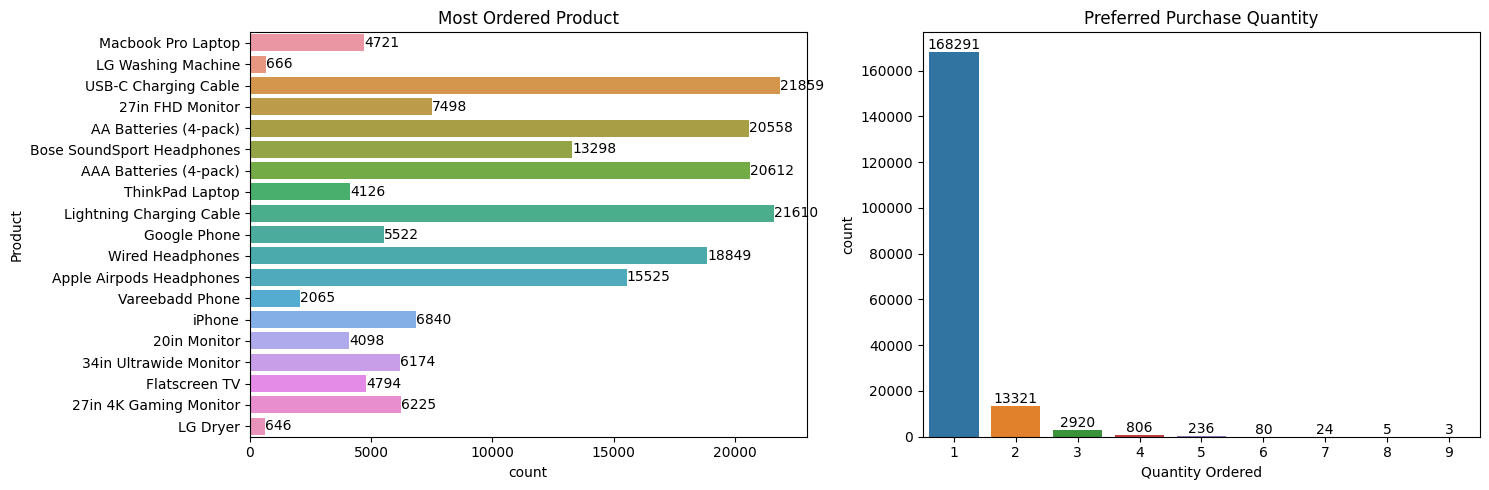

In [196]:
plt.figure(figsize=(15,5))

# Most Ordered Product
ax1 = plt.subplot2grid((1,2),(0,0))

sns.countplot(data=data, y='Product', ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title("Most Ordered Product")

# Preferred Purchase Quantity
ax2 = plt.subplot2grid((1,2),(0,1))

sns.countplot(data=data, x='Quantity Ordered', ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.title("Preferred Purchase Quantity")

plt.tight_layout()
plt.show()

From above countplots we observed that:
 - Top 3 most ordered products - USB-C Charging Cable (21859), Lightning Charging Cable (21610) and AAA Batteries (4-pack) (20612).
 - Bottom 3 least ordered products - LG Dryer (646), LG Washing Machine (666) and Vareebadd Phone (2065).
 - Customers prefer purchasing 1 quantity of items from the products.

In [197]:
# which city has shown maximum number of orders?
data['City'].value_counts().sort_values(ascending=False)

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

In [198]:
# which month has recorded maximum number of orders?
data['Month_Name'].value_counts().sort_values(ascending=False)

December     24944
October      20249
April        18257
November     17544
May          16552
March        15128
July         14275
June         13535
February     11957
August       11943
September    11603
January       9699
Name: Month_Name, dtype: int64

In [199]:
# which week day has recorded maximum number of orders?
data['Day_Name'].value_counts().sort_values(ascending=False)

Tuesday      27137
Sunday       26518
Monday       26508
Saturday     26453
Wednesday    26438
Thursday     26418
Friday       26214
Name: Day_Name, dtype: int64

In [200]:
data['Day_Name'].unique()

array(['Monday', 'Sunday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday',
       'Saturday'], dtype=object)

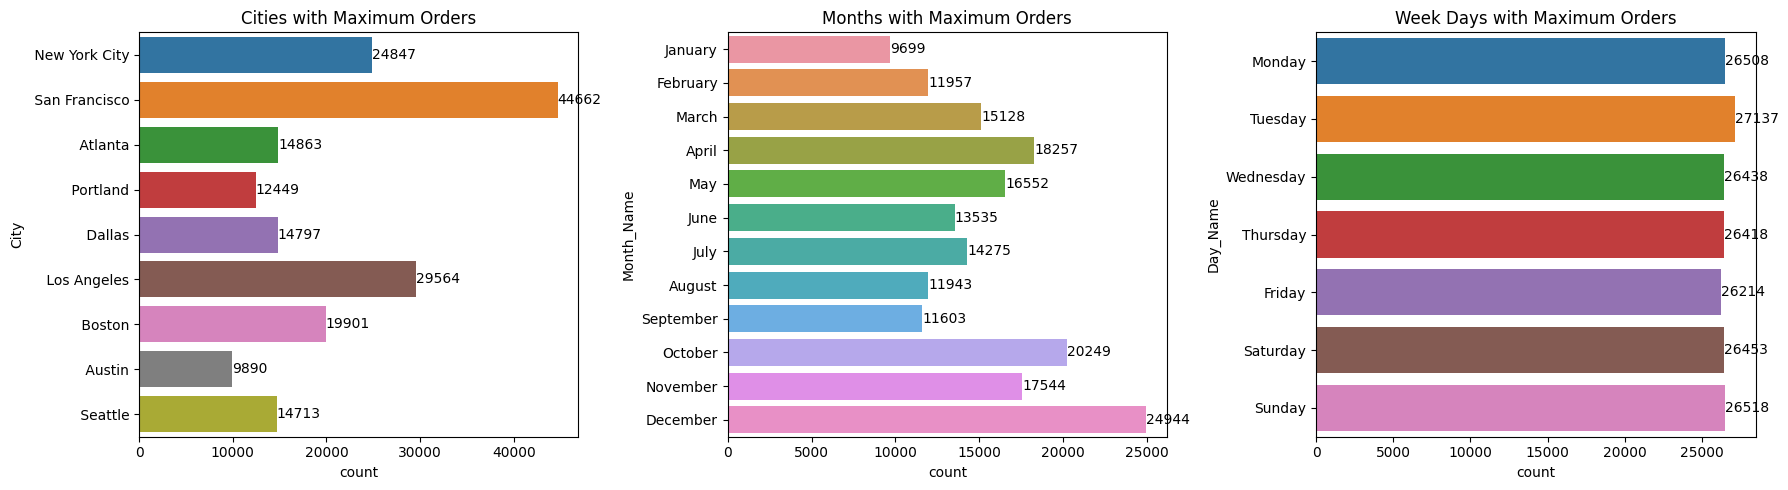

In [201]:
plt.figure(figsize=(18,5))

# Cities with Maximum Orders
ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(data=data, y='City', ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title("Cities with Maximum Orders")

# Months with Maximum Orders
ax2 = plt.subplot2grid((1,3),(0,1))

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sns.countplot(data=data, y='Month_Name', ax=ax2, order=order)
for i in ax2.containers:
    plt.bar_label(i)
plt.title("Months with Maximum Orders")

# Week Days with Maximum Orders
ax3 = plt.subplot2grid((1,3),(0,2))

order = ['Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=data, y='Day_Name', ax=ax3, order=order, palette=sns.color_palette(n_colors=11))
for i in ax3.containers:
    plt.bar_label(i)
plt.title("Week Days with Maximum Orders")

plt.tight_layout()
plt.show()

From above countplots, we observed that:
 - Top 3 cities with maximum orderes are: San Francisco (44662), Los Angeles (29564), New York (24847).
 - Bottom 3 cities with least orders are: Austin (9890), Portland (12449), Seattle (14713).
 - Top 3 months which recorded maximum orders are: December (24944), October (20249), April (18257).
 - Bottom 3 months which recorded least orders are: January (9699), September (11603), August (11943).
 - There is no signigicant difference in the orders when it comes to daily analysis.

In [202]:
# which date of month has recorded maximum number of orders across all data?
data['Day'].value_counts().sort_values(ascending=False)

13    6291
10    6241
2     6187
19    6184
17    6165
26    6150
20    6144
24    6141
18    6132
14    6126
16    6109
27    6108
15    6106
22    6101
9     6100
28    6093
12    6086
21    6085
6     6081
8     6065
11    6060
4     6058
25    6054
1     6042
23    6041
7     6025
5     6015
3     5815
29    5709
30    5623
31    3549
Name: Day, dtype: int64

In [203]:
# What time of the day has recorded maximum number of orders?
data['Hour'].value_counts().sort_values(ascending=False)

19    12886
12    12573
11    12392
18    12263
20    12218
13    12115
14    10965
10    10929
21    10905
17    10884
16    10359
15    10159
22     8808
9      8740
23     6262
8      6252
7      4002
0      3902
6      2481
1      2347
5      1320
2      1242
4       852
3       830
Name: Hour, dtype: int64

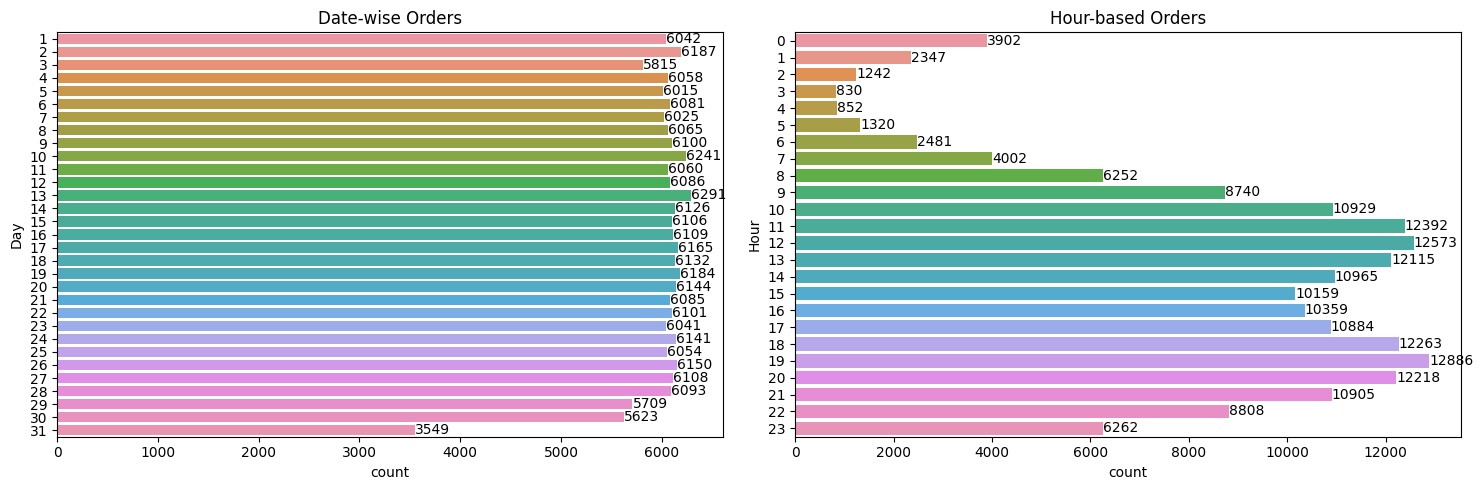

In [204]:
plt.figure(figsize=(15,5))

# Date-wise Orders
ax1 = plt.subplot2grid((1,2),(0,0))

sns.countplot(data=data, y='Day', ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title("Date-wise Orders")

# Hour-based Orders
ax2 = plt.subplot2grid((1,2),(0,1))

sns.countplot(data=data, y='Hour', ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.title("Hour-based Orders")

plt.tight_layout()
plt.show()

From above countplots, we observed that:
 - There is no significant difference when it comes to Day-wise orders although there is significant decrease towards month end.
 - There is a sharp increase in orders between 10 a.m. to 1 p.m. and 5 p.m. to 8 p.m.

In [205]:
data['Sales'].value_counts().sort_values(ascending=False)

14.95      20328
11.95      19975
11.99      17328
150.00     15414
3.84       15315
2.99       13699
99.99      13168
149.99      7455
600.00      6846
700.00      6833
389.99      6211
379.99      6156
300.00      4885
1700.00     4717
5.98        4628
999.99      4124
109.99      4070
7.68        3873
400.00      2062
23.90       1713
8.97        1502
23.98       1380
29.90       1344
11.52       1033
11.96        524
15.36        250
35.85        157
35.97        128
199.98       128
44.85         97
19.20         69
17.94         63
299.98        43
219.98        28
20.93         22
759.98        18
23.04         16
779.98        14
47.96         13
47.80         12
1400.00        7
59.80          7
1200.00        7
23.92          5
3400.00        4
800.00         3
26.91          3
26.88          2
1999.98        2
299.97         2
450.00         1
71.70          1
59.75          1
Name: Sales, dtype: int64

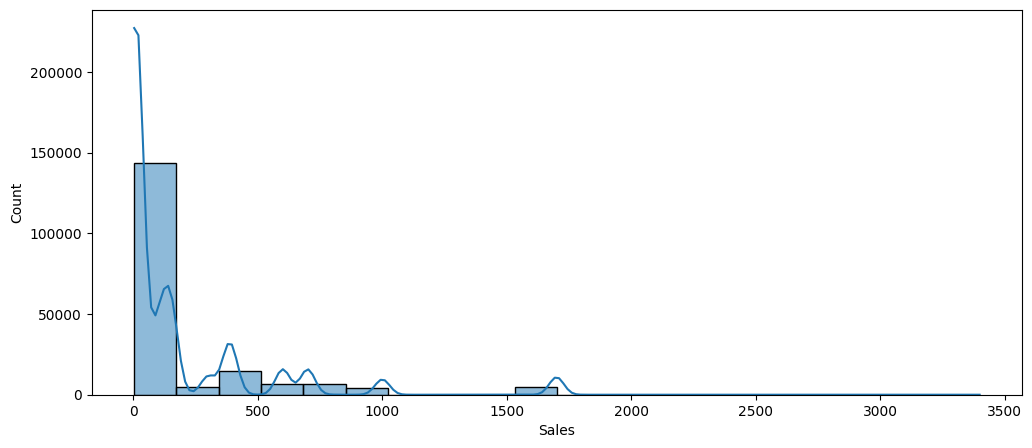

In [206]:
# Histogram of Sales
plt.figure(figsize=(12,5))
sns.histplot(x='Sales', data=data, kde=True, bins=20)
plt.show()

 - The maximum number of orders are valued under $150. 

<h3>Bivariate Analysis:</h3>

In [207]:
# Total Quantity of Product Ordered
data.groupby('Product').agg({'Quantity Ordered':'sum'}).sort_values(ascending=False, by='Quantity Ordered')

,Quantity Ordered
Product,
AAA Batteries (4-pack),30986
AA Batteries (4-pack),27615
USB-C Charging Cable,23931
Lightning Charging Cable,23169
Wired Headphones,20524
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
27in FHD Monitor,7541
iPhone,6847


In [208]:
# Total Sales of Product Ordered
data.groupby('Product').agg({'Sales':'sum'}).sort_values(ascending=False, by='Sales').round(2)

,Sales
Product,
Macbook Pro Laptop,8032500.00
iPhone,4792900.00
ThinkPad Laptop,4127958.72
Google Phone,3317400.00
27in 4K Gaming Monitor,2433147.61
34in Ultrawide Monitor,2352898.08
Apple Airpods Headphones,2345550.00
Flatscreen TV,1443900.00
Bose SoundSport Headphones,1342865.70


In [209]:
# Total Average Sales of Product Ordered
data.groupby('Product').agg({'Sales':'mean'}).sort_values(ascending=False, by='Sales').round(2)

,Sales
Product,
Macbook Pro Laptop,1701.44
ThinkPad Laptop,1000.47
iPhone,700.72
Google Phone,600.76
LG Dryer,600.00
LG Washing Machine,600.00
Vareebadd Phone,400.58
27in 4K Gaming Monitor,390.87
34in Ultrawide Monitor,381.10


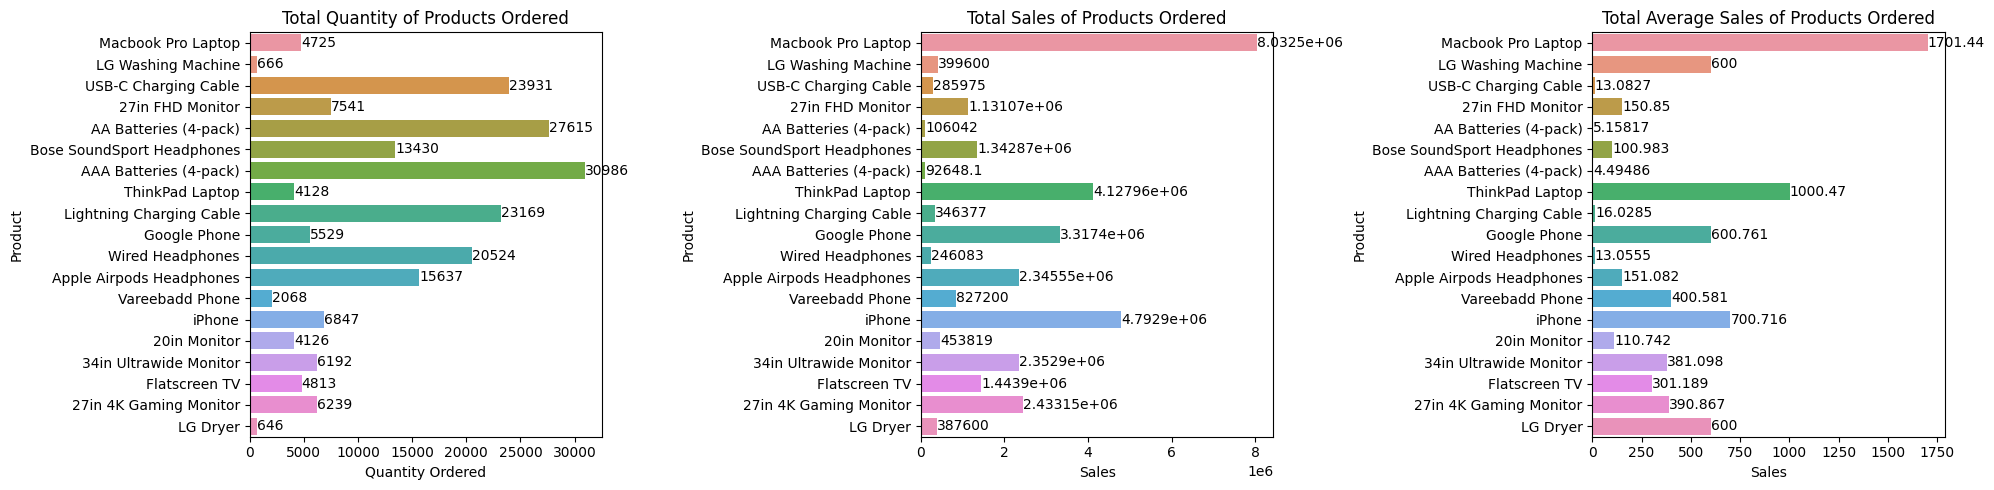

In [210]:
plt.figure(figsize=(20,5))

# Total Quantity of Products Ordered
ax1 = plt.subplot2grid((1,3),(0,0))

sns.barplot(data=data, y='Product', x='Quantity Ordered', ci=None, estimator=np.sum, ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title('Total Quantity of Products Ordered')

# Total Sales of Products Ordered
ax2 = plt.subplot2grid((1,3),(0,1))

sns.barplot(data=data, y='Product', x='Sales', ci=None, estimator=np.sum, ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.title('Total Sales of Products Ordered')

# Total Average Sales of Products Ordered
ax3 = plt.subplot2grid((1,3),(0,2))

sns.barplot(data=data, y='Product', x='Sales', ci=None, estimator=np.mean, ax=ax3)
for i in ax3.containers:
    plt.bar_label(i)
plt.title('Total Average Sales of Products Ordered')

plt.tight_layout()
plt.show()

From above barplots, we observed that:
 - Top 3 products with highest ordered quantity: AAA Batteries (4-pack) (30986), AA Batteries (4-pack) (27615), USB-C Charging Cable (23931).
 - Bottom 3 products with lowest ordered quantity: LG Dryer (646), LG Washing Machine (666), Vareebadd Phone (2068).
 - Top 3 products with highest sales: Macbook Pro Laptop ($8032500), iPhone ($4792900), ThinkPad Laptop ($4127958.72).
 - Bottom 3 products with lowest sales: AAA Batteries (4-pack) ($92648.14), AA Batteries (4-pack) ($106041.60), Wired Headphones ($246082.76).
 - Top 3 products with highest average sales: Macbook Pro Laptop ($1701.44), ThinkPad Laptop ($1000.47), iPhone ($700.72).
 - Bottom 3 products with lowest average sales: AAA Batteries (4-pack) ($4.49), AA Batteries (4-pack) ($5.16), Wired Headphones ($13.06).

In [211]:
# City-wise Total Ordered Quantity
data.groupby('City').agg({'Quantity Ordered':'sum'}).sort_values(ascending=False, by='Quantity Ordered')

,Quantity Ordered
City,
San Francisco,50169
Los Angeles,33247
New York City,27903
Boston,22494
Dallas,16707
Atlanta,16584
Seattle,16534
Portland,14037
Austin,11137


In [212]:
# City-wise Total Sales
data.groupby('City').agg({'Sales':'sum'}).sort_values(ascending=False, by='Sales')

,Sales
City,
San Francisco,8254743.55
Los Angeles,5448304.28
New York City,4661867.14
Boston,3658627.65
Atlanta,2794199.07
Dallas,2765373.96
Seattle,2745046.02
Portland,2319331.94
Austin,1818044.33


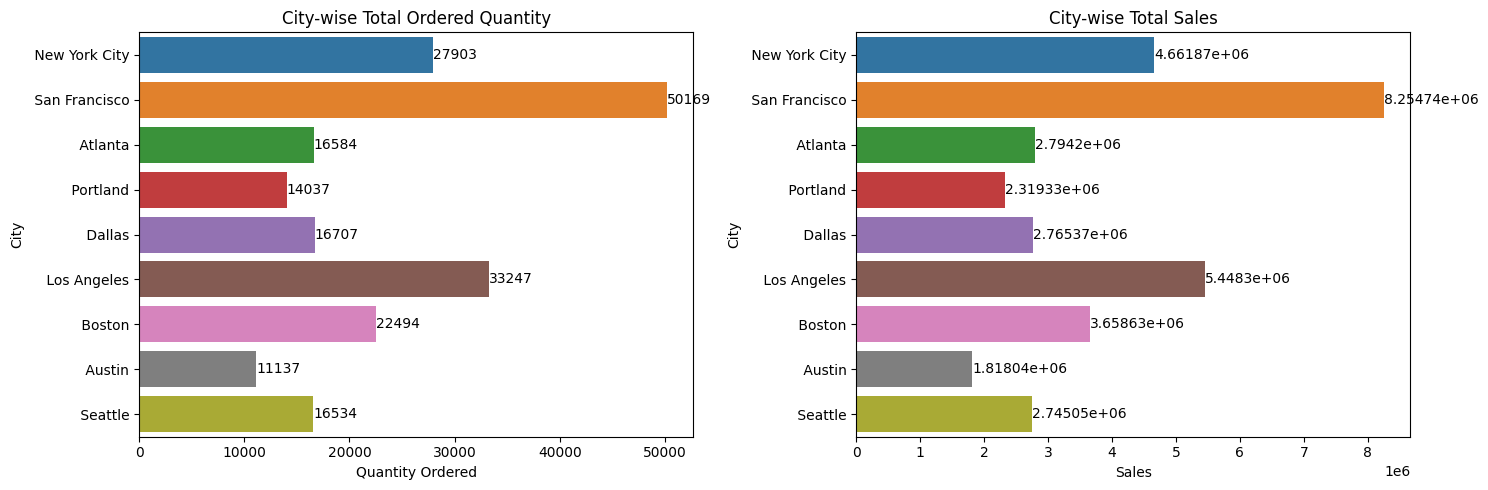

In [213]:
plt.figure(figsize=(15,5))

# City-wise Total Ordered Quantity
ax1 = plt.subplot2grid((1,2),(0,0))

sns.barplot(data=data, y='City', x='Quantity Ordered', ci=None, estimator=np.sum, ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title('City-wise Total Ordered Quantity')

# City-wise Total Sales
ax2 = plt.subplot2grid((1,2),(0,1))

sns.barplot(data=data, y='City', x='Sales', ci=None, estimator=np.sum, ax=ax2)
for i in ax2.containers:
    plt.bar_label(i)
plt.title('City-wise Total Sales')

plt.tight_layout()
plt.show()

From above barplots, we observed that:
 - Top 3 Cities with highest quantity ordered: San Francisco (50169), Los Angeles (33247), New York (27903).
 - Bottom 3 Cities with lowest quantity ordered: Austin	(11137), Portland (14037), Seattle (16534).
 - Top 3 Cities with highest sales recorded: San Francisco ($8254743.55), Los Angeles ($5448304.28), New York ($4661867.14).
 - Bottom 3 Cities with lowest sales recorded: Austin ($1818044.33), Portland ($2319331.94), Seattle ($2745046.02).

In [214]:
# Month-wise Total Quantity Ordered
data.groupby('Month_Name').agg({'Quantity Ordered':'sum'}).sort_values(ascending=False, by='Quantity Ordered')

,Quantity Ordered
Month_Name,
December,28074
October,22669
April,20536
November,19769
May,18653
March,16979
July,16054
June,15234
February,13431


In [215]:
# Month-wise Total Sales
data.groupby('Month_Name').agg({'Sales':'sum'}).sort_values(ascending=False, by='Sales')

,Sales
Month_Name,
December,4608295.70
October,3734777.86
April,3389217.98
November,3197875.05
May,3150616.23
March,2804973.35
July,2646461.32
June,2576280.15
August,2241083.37


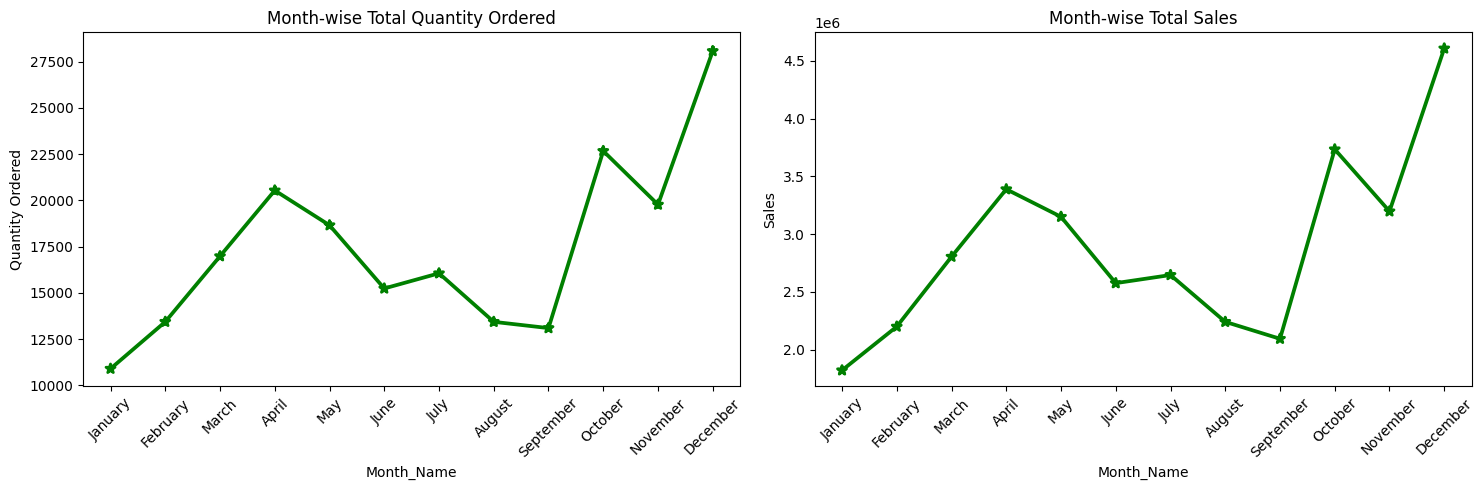

In [216]:
plt.figure(figsize=(15,5))

# Month-wise Total Quantity Ordered
ax1 = plt.subplot2grid((1,2),(0,0))

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.pointplot(data=data, x='Month_Name', y='Quantity Ordered', estimator=np.sum, order=order, ax=ax1, color='g', markers='*')
plt.xticks(rotation=45)
plt.title('Month-wise Total Quantity Ordered')

# Month-wise Total Sales
ax2 = plt.subplot2grid((1,2),(0,1))

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.pointplot(data=data, x='Month_Name', y='Sales', ci=None,estimator=np.sum, order=order, ax=ax2, color='g', markers='*')
plt.xticks(rotation=45)
plt.title('Month-wise Total Sales')

plt.tight_layout()
plt.show()

From above pointplots, we observed that:
 - Top 3 months with highest quantity ordered: December	(28074), October (22669), April	(20536).
 - Bottom 3 months with lowest quantity ordered: January (10893), September	(13091), August	(13429).
 - Top 3 months with highest total sales recorded: December	($4608295.70), October ($3734777.86), April	($3389217.98).
 - Bottom 3 months with lowest total sales recorded: January ($1821413.16), September ($2094465.69), February ($2200078.08).

In [217]:
# Daily Total Quantity Ordered
data.groupby('Day').agg({'Quantity Ordered':'sum'}).sort_values(ascending=False, by='Quantity Ordered')

,Quantity Ordered
Day,
13,7097
26,7010
19,6999
17,6960
10,6957
2,6952
20,6919
12,6916
14,6904


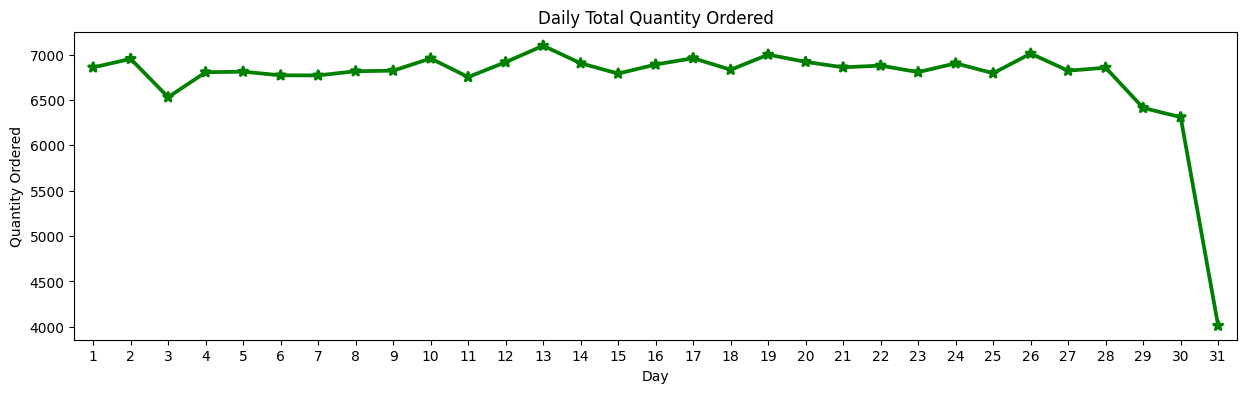

In [227]:
plt.figure(figsize=(15,4))
sns.pointplot(data=data, x='Day', y='Quantity Ordered', ci=None,estimator=np.sum, color='g', markers='*')
plt.title('Daily Total Quantity Ordered')
plt.show()

In [228]:
# Daily Total Sales
data.groupby('Day').agg({'Sales':'sum'}).sort_values(ascending=False, by='Sales')

,Sales
Day,
9,1169049.22
10,1168880.92
11,1167460.67
25,1166707.99
1,1164859.49
4,1163640.17
18,1163342.14
6,1151786.51
20,1143969.50


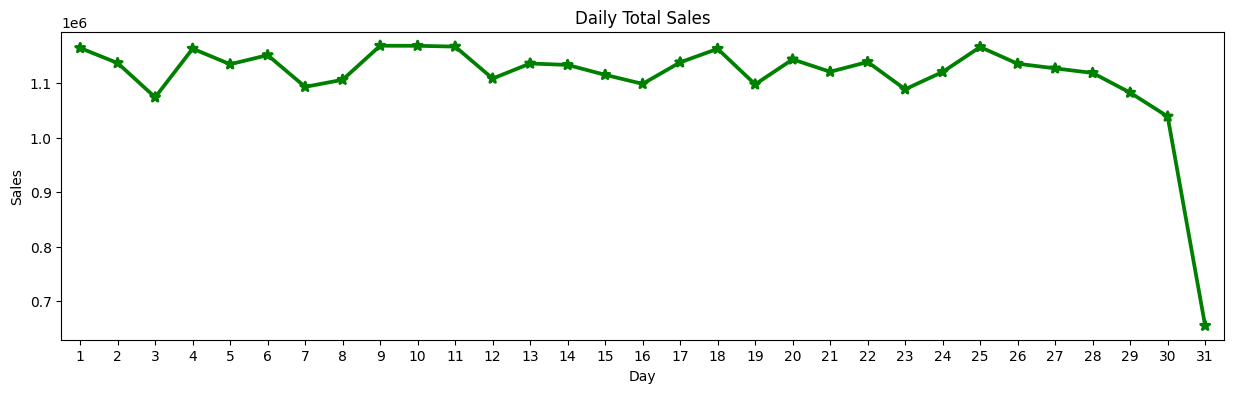

In [229]:
plt.figure(figsize=(15,4))
sns.pointplot(data=data, x='Day', y='Sales', ci=None,estimator=np.sum, color='g', markers='*')
plt.title('Daily Total Sales')
plt.show()

From above pointplots we observed that:
 - There is a significant decrease in the Quantity Ordered and Total Sales towards the end of month.

In [230]:
# Weekly Total Quantity Ordered
data.groupby('Day_Name').agg({'Quantity Ordered':'sum'}).sort_values(ascending=False, by='Quantity Ordered')

,Quantity Ordered
Day_Name,
Tuesday,30686
Monday,29860
Wednesday,29759
Sunday,29745
Saturday,29729
Thursday,29618
Friday,29415


In [231]:
# Weekly Total Sales
data.groupby('Day_Name').agg({'Sales':'sum'}).sort_values(ascending=False, by='Sales')

,Sales
Day_Name,
Tuesday,5086275.40
Wednesday,4986823.36
Sunday,4927249.40
Saturday,4900195.58
Monday,4877588.21
Friday,4853642.26
Thursday,4833763.73


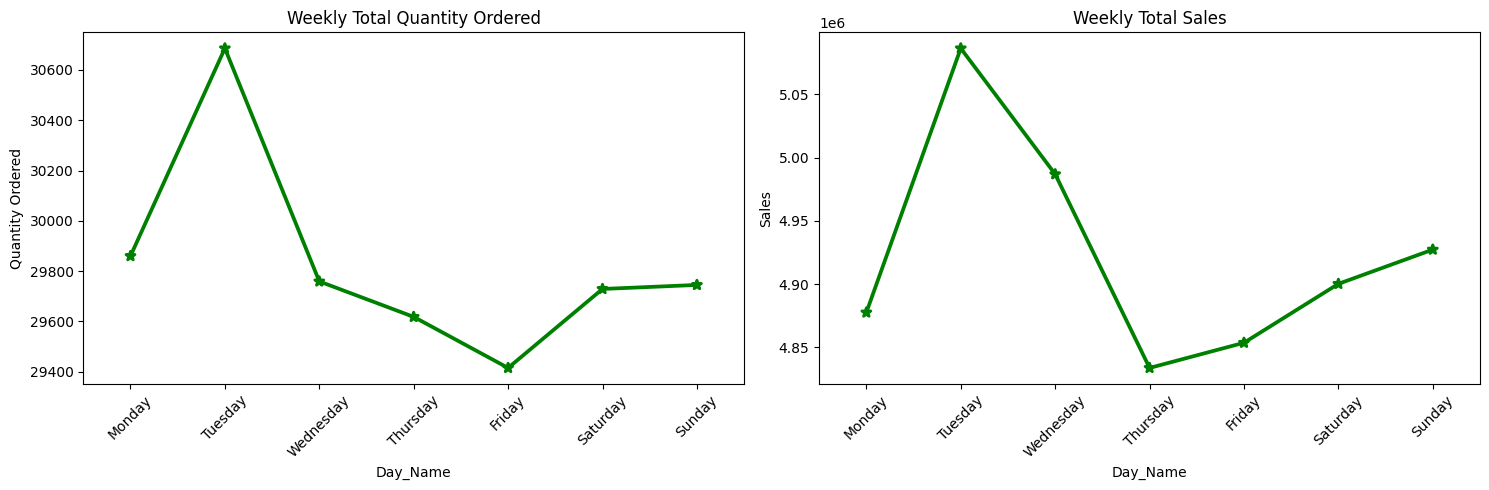

In [235]:
plt.figure(figsize=(15,5))

# Weekly Total Quantity Ordered
ax1 = plt.subplot2grid((1,2),(0,0))

order = ['Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.pointplot(data=data, x='Day_Name', y='Quantity Ordered', ci=None, order=order, estimator=np.sum, ax=ax1, color='g', markers='*')
plt.xticks(rotation=45)
plt.title('Weekly Total Quantity Ordered')

# Weekly Total Sales
ax2 = plt.subplot2grid((1,2),(0,1))

order = ['Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.pointplot(data=data, x='Day_Name', y='Sales', ci=None, order=order, estimator=np.sum, ax=ax2, color='g', markers='*')
plt.xticks(rotation=45)
plt.title('Weekly Total Sales')

plt.tight_layout()
plt.show()

From above pointplots we observed that:
 - Tuesday has recorded highest quantity ordered and total sales, whereas Friday recorded lowest quantity ordered and Thursday recorded lowest total sales.

In [236]:
# Hourly Total Quantity Ordered
data.groupby('Hour').agg({'Quantity Ordered':'sum'}).sort_values(ascending=False, by='Quantity Ordered')

,Quantity Ordered
Hour,
19,14451
12,14188
11,13986
18,13785
20,13758
13,13671
14,12343
10,12292
21,12228


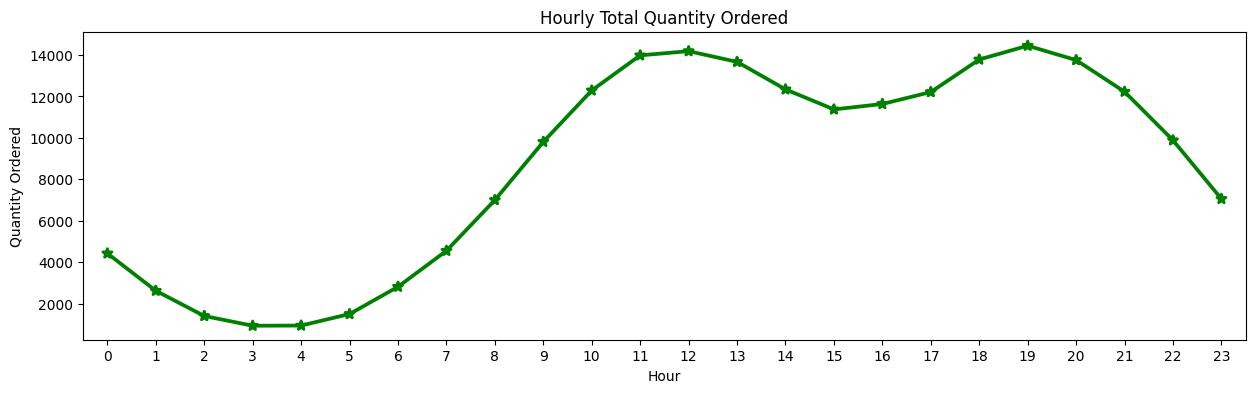

In [237]:
plt.figure(figsize=(15,4))
sns.pointplot(data=data, x='Hour', y='Quantity Ordered', ci=None,estimator=np.sum, color='g', markers='*')
plt.title('Hourly Total Quantity Ordered')
plt.show()

In [238]:
# Hourly Total Sales
data.groupby('Hour').agg({'Sales':'sum'}).sort_values(ascending=False, by='Sales')

,Sales
Hour,
19,2411971.14
12,2314359.85
11,2296619.84
20,2280784.36
18,2218374.01
13,2152369.98
17,2126553.97
14,2082513.70
21,2040790.48


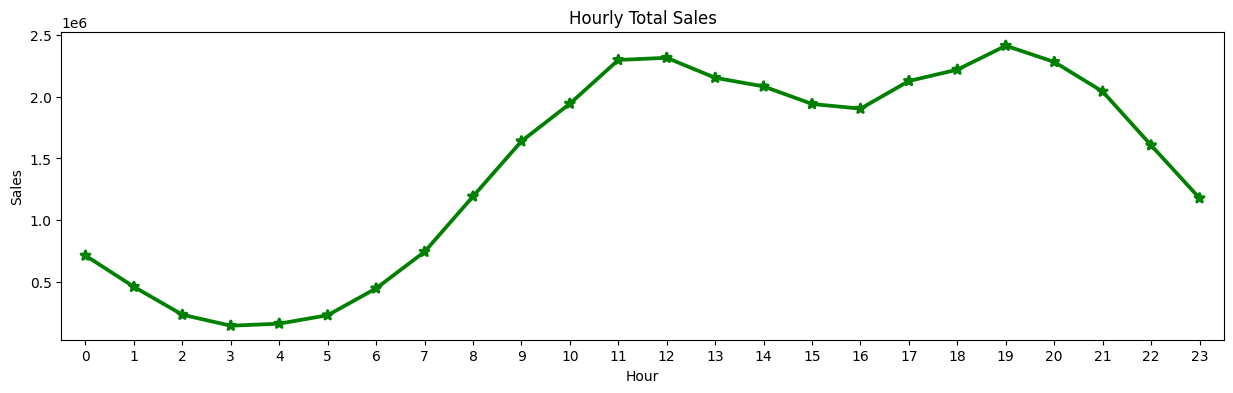

In [239]:
plt.figure(figsize=(15,4))
sns.pointplot(data=data, x='Hour', y='Sales', ci=None,estimator=np.sum, color='g', markers='*')
plt.title('Hourly Total Sales')
plt.show()

From above pointplots we observed that:
 - Total Quantity Ordered and Total Sales show a sharp increase during time 10 a.m. to 1 p.m. and 6 p.m. to 8 p.m.